# Importing libraries and loading dataframes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_finance = pd.read_excel('zippedData/df_Movie_Financials.xlsx')
df_nofinance = pd.read_excel('zippedData/df_Generes_With_tconst.xlsx')
df_IMDB = pd.read_excel('zippedData/df_IMDB_MovieCatalog.xlsx')
df_RottenTomatoes = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
#Investigate the Data
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 17 columns):
Unnamed: 0          5540 non-null int64
tconst              5540 non-null object
P_Cost              5540 non-null float64
Dom_Gross           5540 non-null int64
Frgn_Gross          5540 non-null int64
WW_Gross            5540 non-null int64
Domestic Opening    5540 non-null int64
year                5540 non-null int64
TicketPrice         5540 non-null float64
EstInflation        5540 non-null float64
Multiplier          5540 non-null float64
adj_P_Cost          5540 non-null float64
adj_Frgn_Gross      5540 non-null float64
adj_WW_Gross        5540 non-null float64
Profits             5540 non-null float64
adj_Profits         5540 non-null float64
ROI                 5540 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 735.9+ KB


In [4]:
#Investigate the data
df_RottenTomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#Investigate the data
df_nofinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189509 entries, 0 to 189508
Data columns (total 11 columns):
Unnamed: 0        189509 non-null int64
tconst            189509 non-null object
titleType         189509 non-null object
primaryTitle      189509 non-null object
originalTitle     189509 non-null object
startYear         189509 non-null int64
runtimeMinutes    189509 non-null int64
genres            189509 non-null object
averageRating     189509 non-null float64
numVotes          189509 non-null int64
Splitgeneres      189509 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 15.9+ MB


In [6]:
#Investigate the data
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 12 columns):
Unnamed: 0        31060 non-null int64
tconst            31060 non-null object
primaryTitle      31060 non-null object
startYear         31060 non-null int64
runtimeMinutes    31060 non-null int64
genres            31060 non-null object
startYear_str     31060 non-null int64
titleyear         31060 non-null object
studio_BOM        4560 non-null object
MPAA              2865 non-null object
rd                4560 non-null datetime64[ns]
StudioDesc        4057 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 2.8+ MB


# Creating the histogram, "Distribution of Movies and Their Profitability"

In [7]:
#ADDING A FUNCTION: "IS THIS MOVIE PROFITABLE?"
def percent_profitable(x):
    profitable = []
    not_profitable = []
    for movie in df_finance['adj_Profits']:
        if movie > 0:
            profitable.append(movie)
        else:
            not_profitable.append(movie)
    return len(profitable)/(len(profitable)+len(not_profitable))*100

### Percent Profitable Films = 40.8%

In [8]:
#WHAT PERCENTAGE OF FILMS ARE PROFITABLE?
percent_profitable(df_finance)

40.81227436823105

In [9]:
#CHANGING UNIT OF adj_Profits FROM DOLLARS TO MILLIONS OF DOLLARS
df_finance['adj_Profits_millions'] = df_finance['adj_Profits']/1000000

### Average Profitability = 46.1 Million USD

In [10]:
#IDENTIFYING THE MEAN PROFITABILITY OF FILMS
df_finance['adj_Profits_millions'].mean()

46.142920072355125

### Highest Frequency of Profitability = -20.6 Million USD

In [11]:
#IDENTIFYING THE MOST COMMON PROFITABILITY OF FILMS
df_finance['adj_Profits_millions'].mode()

0   -20.643819
dtype: float64

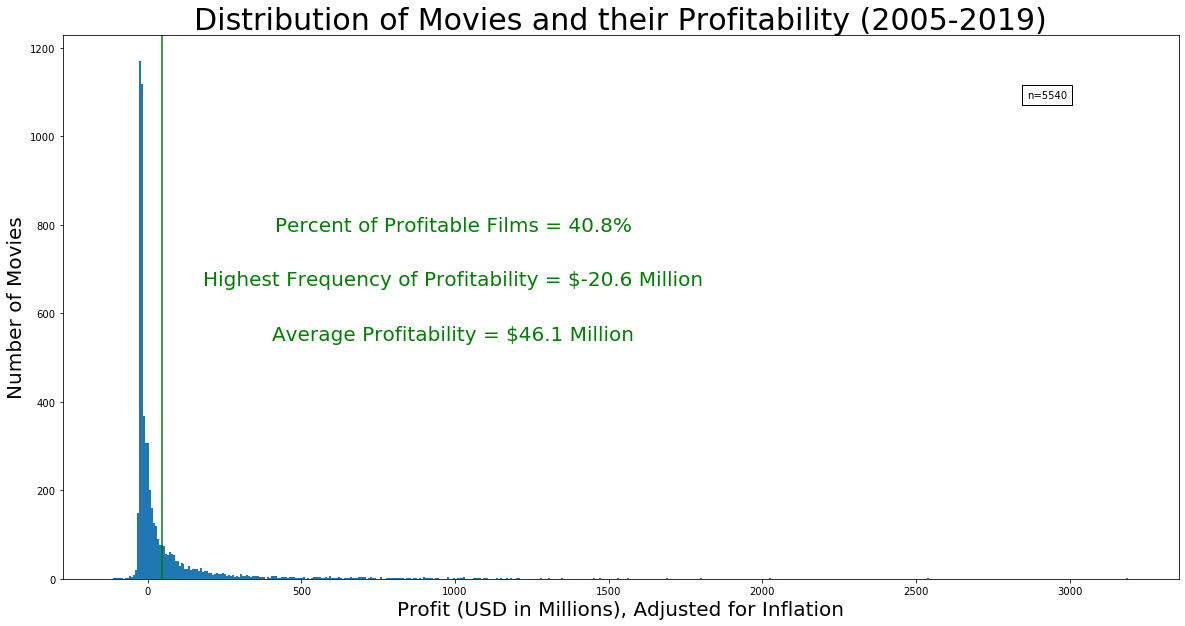

In [12]:
# Create a plot that shows the Distribution of Profit
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(df_finance['adj_Profits_millions'], bins='auto')
ax.set_title('Distribution of Movies and their Profitability (2005-2019)', fontsize=30)
ax.set_xlabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=20)
ax.axvline(df_finance['adj_Profits_millions'].mean(), color='green')
ax.text(0.35, 0.45, 'Average Profitability = $46.1 Million',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(0.35, 0.65, 'Percent of Profitable Films = 40.8%',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(0.35, 0.55, 'Highest Frequency of Profitability = $-20.6 Million',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(.9, .9, 'n=5540', color='black',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='none', edgecolor='black', pad=5.0));

# Creating the barplot, "Movie Genre vs. Profit"

In [13]:
#CREATING 4 COLUMNS OF INTEREST WITH THE COMMON KEY AS TCONST
df_ROI = df_finance.drop(['Unnamed: 0', 'P_Cost', 'Dom_Gross', 'Frgn_Gross', 'WW_Gross', 'Domestic Opening',
                          'year', 'TicketPrice', 'EstInflation', 'Multiplier', 'adj_P_Cost',
                         'adj_Frgn_Gross', 'adj_WW_Gross', 'Profits', 'adj_Profits'], axis=1)
df_profit = df_finance.drop(['Unnamed: 0', 'P_Cost', 'Dom_Gross', 'Frgn_Gross', 'WW_Gross', 'Domestic Opening',
                          'year', 'TicketPrice', 'EstInflation', 'Multiplier', 'adj_P_Cost',
                         'adj_Frgn_Gross', 'adj_WW_Gross', 'Profits', 'ROI'], axis=1)
df_studio = df_IMDB.drop(['Unnamed: 0', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
                          'startYear_str', 'titleyear', 'MPAA', 'rd', 'StudioDesc'], axis=1)
df_genre = df_nofinance.drop(['Unnamed: 0', 'titleType', 'originalTitle', 'startYear', 'runtimeMinutes',
                              'genres', 'averageRating', 'numVotes'], axis=1)
df_studiolong = df_IMDB.drop(['Unnamed: 0', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
                          'startYear_str', 'titleyear', 'MPAA', 'rd', 'studio_BOM'], axis=1)

In [14]:
#CREATING A NEW DATAFRAME CONTAINING ONLY THE COLUMNS OF INTEREST
df0 = pd.merge(df_ROI, df_studio)
df00 = pd.merge(df0, df_studiolong)
df1 = pd.merge(df00, df_genre)
df2 = pd.merge(df1, df_profit)
df2.set_index('tconst', inplace=True)

In [15]:
#SORTED LIST OF THE AVERAGE PROFITABILITY OF FILMS GROUPED BY GENRE
df2.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

,ROI,adj_Profits_millions,adj_Profits
Splitgeneres,,,
Adventure,2.216268,227.716142,2.277161e+08
Sci-Fi,2.050320,203.452591,2.034526e+08
Animation,2.018867,192.254291,1.922543e+08
Fantasy,2.262959,138.374992,1.383750e+08
Family,1.887193,133.171500,1.331715e+08
Action,1.474695,128.946458,1.289465e+08
Musical,0.554663,76.483886,7.648389e+07
Comedy,1.353276,65.233854,6.523385e+07
Thriller,2.742447,55.270375,5.527037e+07


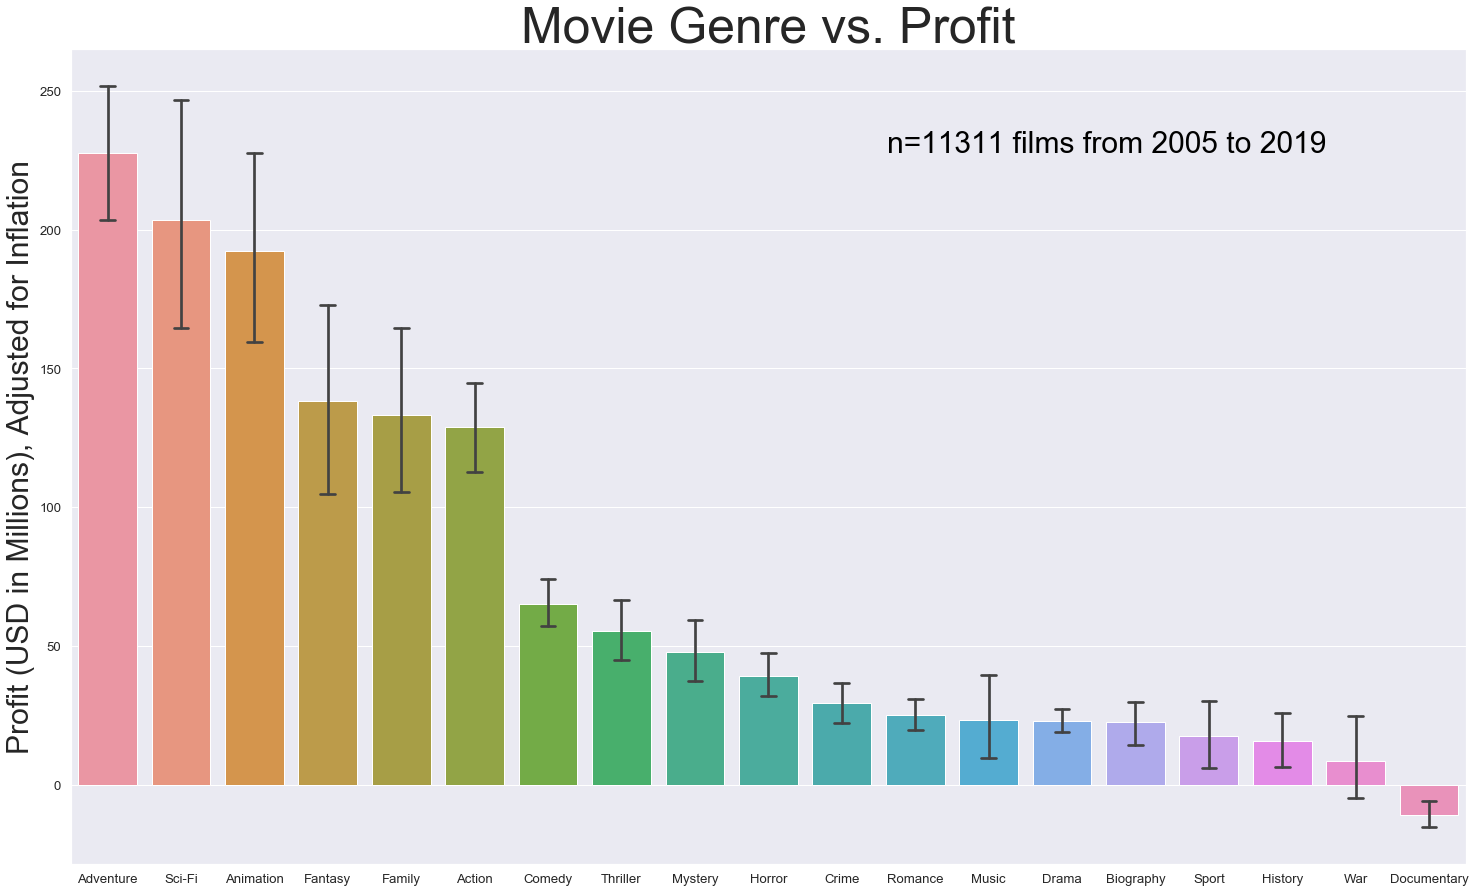

In [16]:
# BARPLOT OF AVERAGE PROFITABILITY OF FILM BY GENRE
plt.figure(figsize=(25,15))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(x="Splitgeneres", y="adj_Profits_millions",
                 data=df2, capsize=.2,
                 order=["Adventure", "Sci-Fi", "Animation", "Fantasy", "Family",
                        "Action", "Comedy", "Thriller", "Mystery", "Horror", "Crime",
                        "Romance", "Music", "Drama", "Biography", "Sport", "History",
                        "War", "Documentary"])
ax.set_title('Movie Genre vs. Profit', fontsize=50)
ax.set_ylabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=30)
ax.set_xlabel('', fontsize=1)
ax.text(.9, .9, 'n=11311 films from 2005 to 2019',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);

# Creating the barplot, "Movie Genre vs. Profit"

### Isolating the top 20 production studios

In [17]:
#REMOVING '0' VALUES FOR studio_BOM
df3 = df2[df2.studio_BOM != '0']

In [18]:
#SORTING PRODUCTION STUDIOS WITH THE 20 HIGHEST AVERAGE PROFIT PER FILM
df3.groupby(['studio_BOM']).mean().sort_values(by='adj_Profits', ascending=False).head(20)

,ROI,adj_Profits_millions,adj_Profits
studio_BOM,,,
HC,27.914466,877.693686,8.776937e+08
P/DW,2.617964,490.950737,4.909507e+08
BV,2.319152,376.058716,3.760587e+08
GrtIndia,7.471946,234.154305,2.341543e+08
Uni.,4.885439,205.514180,2.055142e+08
Fox,2.633078,204.586520,2.045865e+08
WB (NL),18.970648,194.384722,1.943847e+08
Sony,2.448245,184.759220,1.847592e+08
Par.,4.404689,176.850243,1.768502e+08


In [19]:
#SORTING GENRE WITH THE HIGHEST AVERAGE PROFIT PER FILM
df3.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

,ROI,adj_Profits_millions,adj_Profits
Splitgeneres,,,
Sci-Fi,2.747975,297.996277,2.979963e+08
Animation,2.724538,293.901314,2.939013e+08
Adventure,2.617286,283.232454,2.832325e+08
Action,1.792168,156.845824,1.568458e+08
Fantasy,2.297497,146.079222,1.460792e+08
Family,2.214454,139.267449,1.392674e+08
Comedy,1.991513,93.950151,9.395015e+07
Thriller,4.922148,86.875416,8.687542e+07
Mystery,9.182204,74.669463,7.466946e+07


In [20]:
#IDENTIFY A LIST OF ALL PRODUCTION STUDIOS
list(df3.studio_BOM.unique())

['P/DW',
 'IFC',
 'Fox',
 'Uni.',
 'FD',
 'LGF',
 'Mira.',
 'BV',
 'Wein.',
 'WB',
 'Over.',
 'Sony',
 'Par.',
 'Magn.',
 'W/Dim.',
 'RAtt.',
 'FoxS',
 'CBS',
 'Zeit.',
 'Focus',
 'WB (NL)',
 'Rela.',
 'SGem',
 'SMod',
 'LG/S',
 'Sum.',
 'App.',
 'EOne',
 'Amazon',
 'CL',
 'Osci.',
 'SPC',
 'STX',
 'BG',
 'Gold.',
 'ATO',
 'Relbig.',
 'Strand',
 'MGM',
 'Free',
 'Anch.',
 'Arth.',
 'TriS',
 'Abr.',
 'KC',
 'Drft.',
 'Hann.',
 'ORF',
 'MNE',
 'Jan.',
 'CJ',
 'NGE',
 'Eros',
 'SD',
 'Rog.',
 'PDA',
 'RTWC',
 'Imag.',
 'GK',
 'A24',
 'CE',
 'UTV',
 'MBox',
 'LD',
 'Cohen',
 'ParV',
 'Vari.',
 'BST',
 'IM',
 'KL',
 'Yash',
 'EXCL',
 'Ampl.',
 'PH',
 'AF',
 'WGUSA',
 'Aviron',
 'Cdgm.',
 'Trib.',
 'Saban',
 'FCW',
 'FM',
 'BSC',
 'ENTMP',
 'WAMCR',
 'PM&E',
 'Electric',
 'BH Tilt',
 'Good Deed',
 'FIP',
 'Cleopatra',
 'LGP',
 'FR',
 'Crnth',
 'Fathom',
 'TFA',
 'Orch.',
 'Studio 8',
 'FUN',
 'Rel.',
 'EC',
 'Elev.',
 'Rialto',
 'PNT',
 'Global Road',
 'UEP',
 'GrtIndia',
 'Vita.',
 'Annapur

In [21]:
#CREATING A DATAFRAME CONTAINING ONLY THE 20 STUDIOS WITH HIGHEST AVERAGE PROFTIABILITY PER FILM
df4 = df3[df3.studio_BOM != 'IFC']
df5 = df4[df4.studio_BOM != 'FD']
df6 = df5[df5.studio_BOM != 'Mira.']
df7 = df6[df6.studio_BOM != 'BH Tilt']
df8 = df7[df7.studio_BOM != 'Over.']
df9 = df8[df8.studio_BOM != 'ParV']
df10 = df9[df9.studio_BOM != 'Magn.']
df11 = df10[df10.studio_BOM != 'W/Dim.']
df12 = df11[df11.studio_BOM != 'RAtt.']
df13 = df12[df12.studio_BOM != 'CBS']
df14 = df13[df13.studio_BOM != 'Zeit.']
df15 = df14[df14.studio_BOM != 'Focus']
df16 = df15[df15.studio_BOM != 'Rela.']
df17 = df16[df16.studio_BOM != 'SMod']
df18 = df17[df17.studio_BOM != 'Affirm']
df19 = df18[df18.studio_BOM != 'App.']
df20 = df19[df19.studio_BOM != 'EOne']
df21 = df20[df20.studio_BOM != 'Amazon']
df22 = df21[df21.studio_BOM != 'CL']
df23 = df22[df22.studio_BOM != 'Osci.']
df24 = df23[df23.studio_BOM != 'SPC']
df25 = df24[df24.studio_BOM != 'STX']
df26 = df25[df25.studio_BOM != 'BG']
df27 = df26[df26.studio_BOM != 'Gold.']
df28 = df27[df27.studio_BOM != 'ATO']
df29 = df28[df28.studio_BOM != 'Relbig.']
df30 = df29[df29.studio_BOM != 'Strand']
df31 = df30[df30.studio_BOM != 'ENTMP']
df32 = df31[df31.studio_BOM != 'Free']
df33 = df32[df32.studio_BOM != 'Anch.']
df34 = df33[df33.studio_BOM != 'Arth.']
df35 = df34[df34.studio_BOM != 'Abr.']
df36 = df35[df35.studio_BOM != 'KC']
df37 = df36[df36.studio_BOM != 'Drft.']
df38 = df37[df37.studio_BOM != 'Hann.']
df39 = df38[df38.studio_BOM != 'ORF']
df40 = df39[df39.studio_BOM != 'MNE']
df41 = df40[df40.studio_BOM != 'Jan.']
df42 = df41[df41.studio_BOM != 'CJ']
df43 = df42[df42.studio_BOM != 'NGE']
df44 = df43[df43.studio_BOM != 'Eros']
df45 = df44[df44.studio_BOM != 'SD']
df46 = df45[df45.studio_BOM != 'Rog.']
df47 = df46[df46.studio_BOM != 'PDA']
df48 = df47[df47.studio_BOM != 'RTWC']
df49 = df48[df48.studio_BOM != 'Imag.']
df50 = df49[df49.studio_BOM != 'GK']
df51 = df50[df50.studio_BOM != 'A24']
df52 = df51[df51.studio_BOM != 'CE']
df53 = df52[df52.studio_BOM != 'UTV']
df54 = df53[df53.studio_BOM != 'MBox']
df55 = df54[df54.studio_BOM != 'LD']
df56 = df55[df55.studio_BOM != 'Cohen']
df57 = df56[df56.studio_BOM != 'Vari.']
df58 = df57[df57.studio_BOM != 'BST']
df59 = df58[df58.studio_BOM != 'IM']
df60 = df59[df59.studio_BOM != 'KL']
df61 = df60[df60.studio_BOM != 'Yash']
df62 = df61[df61.studio_BOM != 'EXCL']
df63 = df62[df62.studio_BOM != 'Ampl.']
df64 = df63[df63.studio_BOM != 'PH']
df65 = df64[df64.studio_BOM != 'AF']
df66 = df65[df65.studio_BOM != 'Aviron']
df67 = df66[df66.studio_BOM != 'Cdgm.']
df68 = df67[df67.studio_BOM != 'Trib.']
df69 = df68[df68.studio_BOM != 'Saban']
df70 = df69[df69.studio_BOM != 'FCW']
df71 = df70[df70.studio_BOM != 'FM']
df72 = df71[df71.studio_BOM != 'BSC']
df73 = df72[df72.studio_BOM != 'PM&E']
df74 = df73[df73.studio_BOM != 'Electric']
df75 = df74[df74.studio_BOM != 'Good Deed']
df76 = df75[df75.studio_BOM != 'FIP']
df77 = df76[df76.studio_BOM != 'Cleopatra']
df78 = df77[df77.studio_BOM != 'LGP']
df79 = df78[df78.studio_BOM != 'FR']
df80 = df79[df79.studio_BOM != 'Crnth']
df81 = df80[df80.studio_BOM != 'Fathom']
df82 = df81[df81.studio_BOM != 'TFA']
df83 = df82[df82.studio_BOM != 'Orch.']
df84 = df83[df83.studio_BOM != 'Studio 8']
df85 = df84[df84.studio_BOM != 'FUN']
df86 = df85[df85.studio_BOM != 'Rel.']
df87 = df86[df86.studio_BOM != 'EC']
df88 = df87[df87.studio_BOM != 'Elev.']
df89 = df88[df88.studio_BOM != 'Rialto']
df90 = df89[df89.studio_BOM != 'PNT']
df91 = df90[df90.studio_BOM != 'Global Road']
df92 = df91[df91.studio_BOM != 'UEP']
df93 = df92[df92.studio_BOM != 'Vita.']
df94 = df93[df93.studio_BOM != 'Annapurna']
df95 = df94[df94.studio_BOM != 'Zee']
df96 = df95[df95.studio_BOM != 'Neon']
df97 = df96[df96.studio_BOM != 'Orion']
df98 = df97[df97.studio_BOM != 'Gaatri']
df99 = df98[df98.studio_BOM != 'VPD']
df100 = df99[df99.studio_BOM != 'PFR']
df101 = df100[df100.studio_BOM != 'JBG']
df102 = df101[df101.studio_BOM != 'Dreamwest']
df103 = df102[df102.studio_BOM != 'Crimson']
df104 = df103[df103.studio_BOM != 'RLJ']
df105 = df104[df104.studio_BOM != 'PackYourBag']
df106 = df105[df105.studio_BOM != 'Distrib.']
df107 = df106[df106.studio_BOM != 'Trafalgar']
df108 = df107[df107.studio_BOM != 'VE']
df109 = df108[df108.studio_BOM != 'FInd.']
df110 = df109[df109.studio_BOM != 'KKM']
df111 = df110[df110.studio_BOM != 'WHE']
df112 = df111[df111.studio_BOM != 'CGld']
df113 = df112[df112.studio_BOM != 'AR']
df114 = df113[df113.studio_BOM != 'Grindstone']

df_top20studio0 = df114

In [22]:
#SORTED LIST OF THE AVERAGE PROFITABILITY OF FILMS PRODUCED BY THE 20 PRODUCTION STUDIOS
#WITH THE GREATEST AVERAGE PROFITABLITY PER FILM GROUPED BY GENRE
df_top20studio0.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

,ROI,adj_Profits_millions,adj_Profits
Splitgeneres,,,
Animation,3.330891,361.032095,3.610321e+08
Sci-Fi,2.915054,349.973653,3.499737e+08
Adventure,2.954349,341.960769,3.419608e+08
Action,2.452573,230.598485,2.305985e+08
Fantasy,2.254415,190.193155,1.901932e+08
Musical,2.218503,179.784411,1.797844e+08
Western,2.385105,169.767075,1.697671e+08
Family,2.436573,155.301853,1.553019e+08
Thriller,8.273575,147.780256,1.477803e+08


In [23]:
#REMOVING GENRES WITH ONLY ONE DATAPOINT
df_top20studio1 = df_top20studio0[df_top20studio0.Splitgeneres != 'Musical']
df_top20studio2 = df_top20studio1[df_top20studio1.Splitgeneres != 'Western']
df_top20studio3 = df_top20studio2[df_top20studio2.Splitgeneres != 'Music']

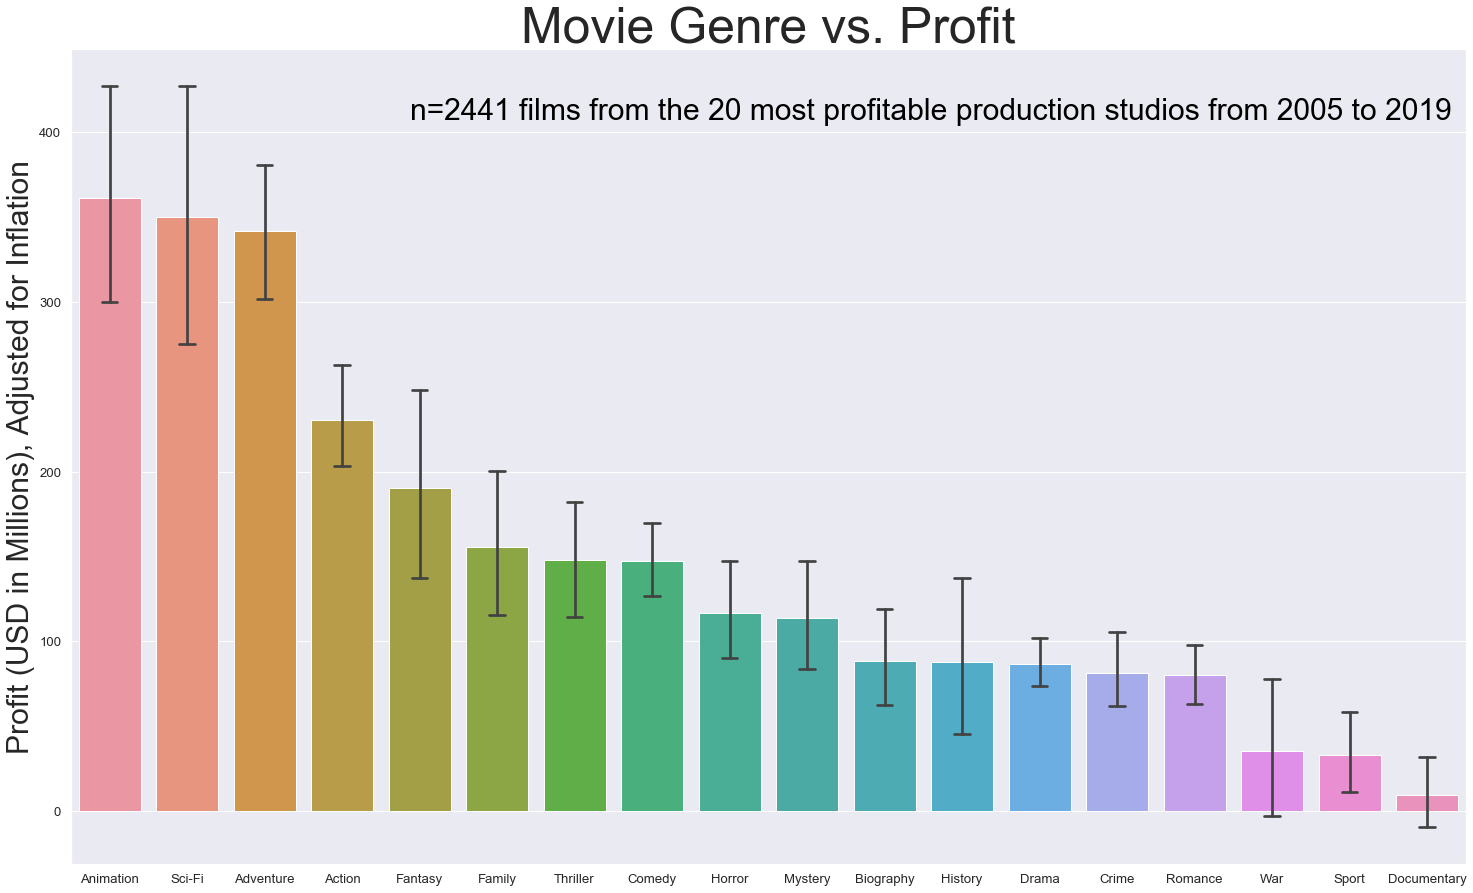

In [24]:
#BARPLOT OF AVERAGE PROFITABILITY OF FILM BY GENRE,
#ONLY INCORPORATING THE 20 STUDIOS WITH THE GREATEST AVERAGE PROFITABILITY PER FILM
plt.figure(figsize=(25,15))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(x="Splitgeneres", y="adj_Profits_millions",
                 data=df_top20studio3, capsize=.2,
                 order=["Animation", "Sci-Fi", "Adventure", "Action", "Fantasy", "Family",
                        "Thriller", "Comedy", "Horror", "Mystery", "Biography", "History",
                        "Drama", "Crime", "Romance", "War", "Sport", "Documentary"])
ax.set_title('Movie Genre vs. Profit', fontsize=50)
ax.set_ylabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=30)
ax.set_xlabel('', fontsize=1)
ax.text(.99, .94, 'n=2441 films from the 20 most profitable production studios from 2005 to 2019',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);

# Creating the stacked histogram, "Frequency of Movie Produced by Genre, 2005-2019"

### Isolating the top 3 production studios

In [25]:
#CREATING A DATAFRAME CONTAINING ONLY THE 3 STUDIOS WITH HIGHEST AVERAGE PROFTIABILITY PER FILM
df_top19studio = df_top20studio0[df_top20studio0.studio_BOM != 'Fox']
df_top18studio = df_top19studio[df_top19studio.studio_BOM != 'WB (NL)']
df_top17studio = df_top18studio[df_top18studio.studio_BOM != 'Sony']
df_top16studio = df_top17studio[df_top17studio.studio_BOM != 'Par.']
df_top15studio = df_top16studio[df_top16studio.studio_BOM != 'WB']
df_top14studio = df_top15studio[df_top15studio.studio_BOM != 'Sum.']
df_top13studio = df_top14studio[df_top14studio.studio_BOM != 'MGM']
df_top12studio = df_top13studio[df_top13studio.studio_BOM != 'WAMCR']
df_top11studio = df_top12studio[df_top12studio.studio_BOM != 'LG/S']
df_top10studio = df_top11studio[df_top11studio.studio_BOM != 'LGF']
df_top9studio = df_top10studio[df_top10studio.studio_BOM != 'Wein.']
df_top8studio = df_top9studio[df_top9studio.studio_BOM != 'SGem']
df_top7studio = df_top8studio[df_top8studio.studio_BOM != 'TriS']
df_top6studio = df_top7studio[df_top7studio.studio_BOM != 'WGUSA']
df_top5studio = df_top6studio[df_top6studio.studio_BOM != 'FoxS']
df_top4studio = df_top5studio[df_top5studio.studio_BOM != 'HC']
df_top3studio = df_top4studio[df_top4studio.studio_BOM != 'GrtIndia']
df_top3studio['studio_BOM'].replace({'P/DW': 'DreamWorks', 'Uni.':'Universal Pictures', 'BV': 'Disney'}, inplace=True)
df_top3studio.rename(columns={'Splitgeneres': 'Genre','studio_BOM': 'Production Studio'}, inplace=True)

/Users/tlipman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/tlipman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


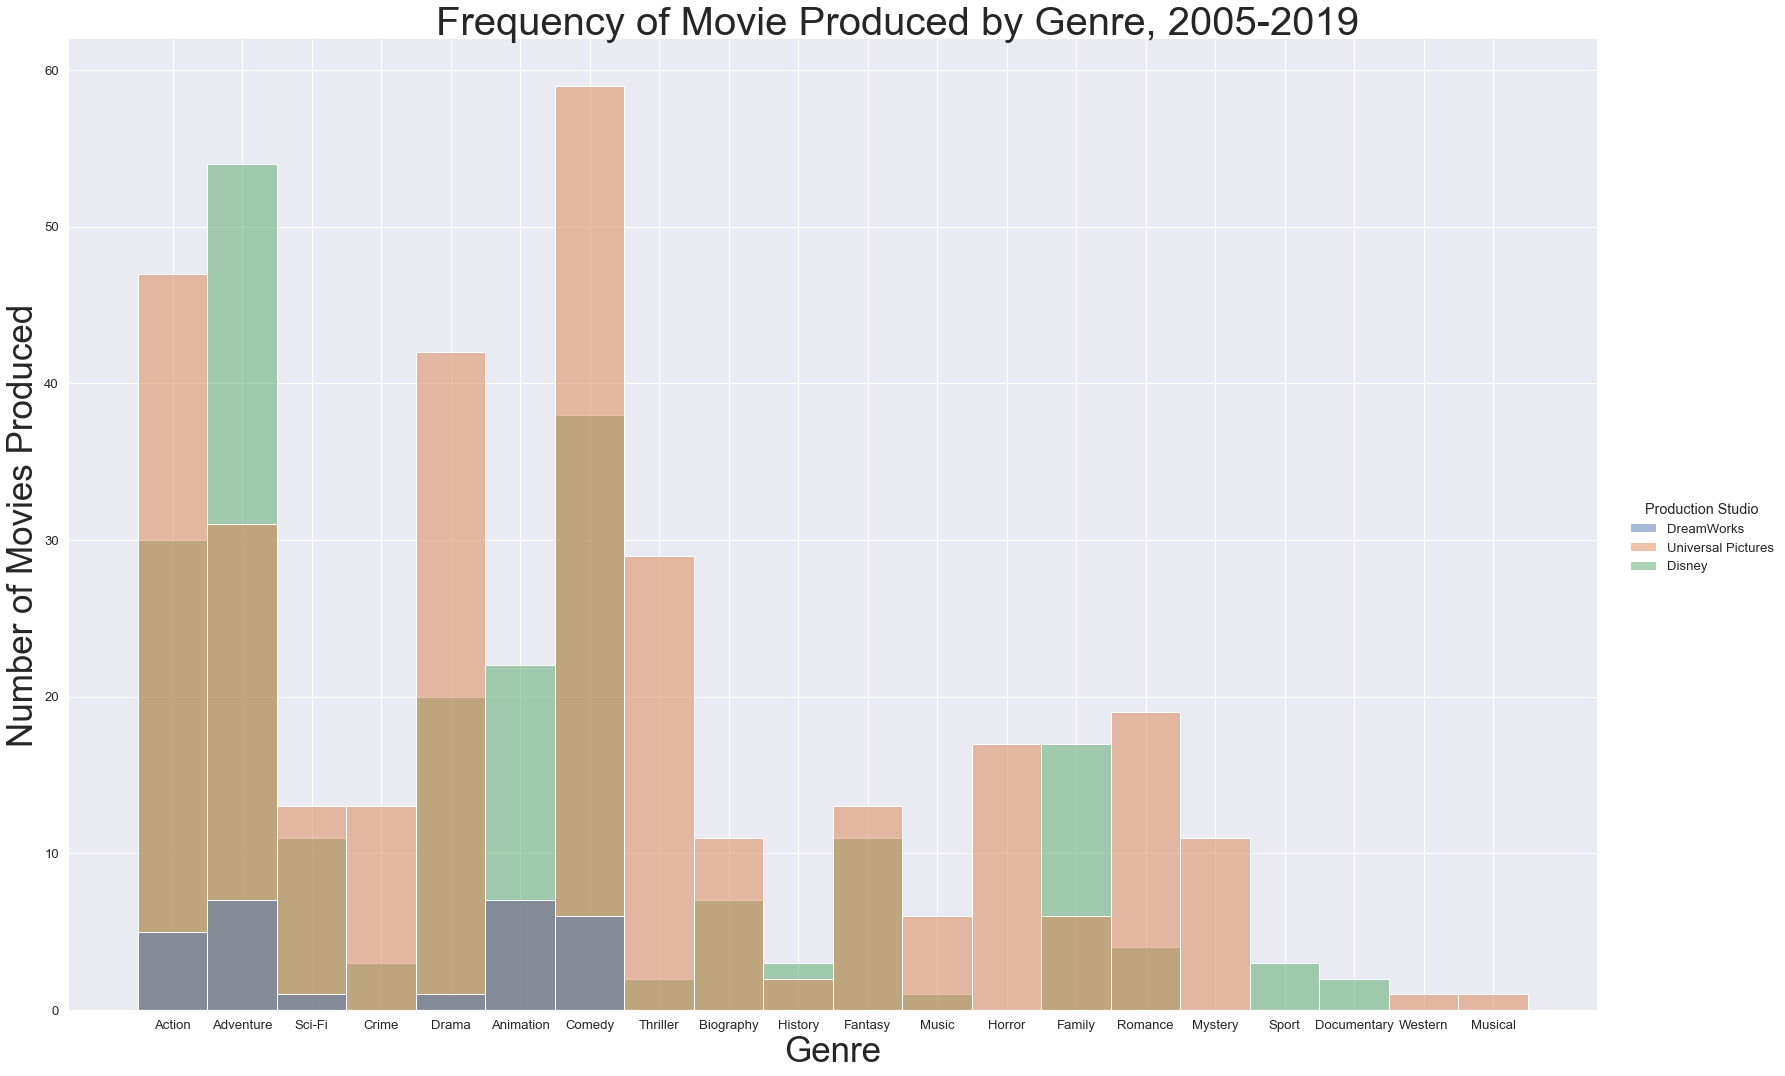

In [26]:
#STACKED HISTOGRAM OF THREE STUDIOS WITH GREATEST AVERAGE PROFITABILITY PER FILM
g = sns.displot(data=df_top3studio, x="Genre", hue="Production Studio",
            height=15, color="husl", aspect=1.5)
g.set_xlabels('Genre', fontsize=35)
g.set_ylabels('Number of Movies Produced', fontsize=35)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Frequency of Movie Produced by Genre, 2005-2019', fontsize=40);